# COVID-19 DataSet EDA

## Initializaion

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd
import plotly.express as px
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

In [2]:
usa_data = pd.read_csv('./usa_county_wise.csv')
daily_data = pd.read_csv('./day_wise.csv')

In [3]:
country_data = pd.read_csv('./country_wise_latest.csv')

## Data Raw view

In [4]:
country_data.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
region_data = country_data['Country/Region']
confirmed_data = country_data['Confirmed']

region_confirmed_data = []
for i in range(len(region_data)):
    region_confirmed_data.append([region_data[i], confirmed_data[i]])

In [6]:
region_confirmed_data

[['Afghanistan', 36263],
 ['Albania', 4880],
 ['Algeria', 27973],
 ['Andorra', 907],
 ['Angola', 950],
 ['Antigua and Barbuda', 86],
 ['Argentina', 167416],
 ['Armenia', 37390],
 ['Australia', 15303],
 ['Austria', 20558],
 ['Azerbaijan', 30446],
 ['Bahamas', 382],
 ['Bahrain', 39482],
 ['Bangladesh', 226225],
 ['Barbados', 110],
 ['Belarus', 67251],
 ['Belgium', 66428],
 ['Belize', 48],
 ['Benin', 1770],
 ['Bhutan', 99],
 ['Bolivia', 71181],
 ['Bosnia and Herzegovina', 10498],
 ['Botswana', 739],
 ['Brazil', 2442375],
 ['Brunei', 141],
 ['Bulgaria', 10621],
 ['Burkina Faso', 1100],
 ['Burma', 350],
 ['Burundi', 378],
 ['Cabo Verde', 2328],
 ['Cambodia', 226],
 ['Cameroon', 17110],
 ['Canada', 116458],
 ['Central African Republic', 4599],
 ['Chad', 922],
 ['Chile', 347923],
 ['China', 86783],
 ['Colombia', 257101],
 ['Comoros', 354],
 ['Congo (Brazzaville)', 3200],
 ['Congo (Kinshasa)', 8844],
 ['Costa Rica', 15841],
 ["Cote d'Ivoire", 15655],
 ['Croatia', 4881],
 ['Cuba', 2532],
 ['Cyp

In [7]:
region_confirmed_data.sort(key = lambda x:-x[1])

In [8]:
region_confirmed_data

[['US', 4290259],
 ['Brazil', 2442375],
 ['India', 1480073],
 ['Russia', 816680],
 ['South Africa', 452529],
 ['Mexico', 395489],
 ['Peru', 389717],
 ['Chile', 347923],
 ['United Kingdom', 301708],
 ['Iran', 293606],
 ['Pakistan', 274289],
 ['Spain', 272421],
 ['Saudi Arabia', 268934],
 ['Colombia', 257101],
 ['Italy', 246286],
 ['Turkey', 227019],
 ['Bangladesh', 226225],
 ['France', 220352],
 ['Germany', 207112],
 ['Argentina', 167416],
 ['Canada', 116458],
 ['Iraq', 112585],
 ['Qatar', 109597],
 ['Indonesia', 100303],
 ['Egypt', 92482],
 ['China', 86783],
 ['Kazakhstan', 84648],
 ['Philippines', 82040],
 ['Ecuador', 81161],
 ['Sweden', 79395],
 ['Oman', 77058],
 ['Bolivia', 71181],
 ['Belarus', 67251],
 ['Ukraine', 67096],
 ['Belgium', 66428],
 ['Kuwait', 64379],
 ['Dominican Republic', 64156],
 ['Israel', 63985],
 ['Panama', 61442],
 ['United Arab Emirates', 59177],
 ['Netherlands', 53413],
 ['Singapore', 50838],
 ['Portugal', 50299],
 ['Romania', 45902],
 ['Guatemala', 45309],
 ['

In [9]:
other_confirmed = 0
for i in range(10, len(region_confirmed_data)):
    other_confirmed = other_confirmed + region_confirmed_data[i][1]
    print(region_confirmed_data[i][1])
    
    
region_confirmed_data = region_confirmed_data[0:10]
region_confirmed_data.append(['Others', other_confirmed])

274289
272421
268934
257101
246286
227019
226225
220352
207112
167416
116458
112585
109597
100303
92482
86783
84648
82040
81161
79395
77058
71181
67251
67096
66428
64379
64156
63985
61442
59177
53413
50838
50299
45902
45309
43402
41180
39741
39482
37390
36263
34477
33624
33296
31142
30446
27973
25892
24141
23154
21209
20887
20558
18752
17975
17110
15988
15841
15655
15516
15303
15035
14547
14203
13761
11424
10621
10621
10498
10213
9764
9690
9132
8904
8844
7413
7398
7340
7235
7189
7055
6321
6208
5059
4881
4880
4599
4552
4548
4448
4227
3882
3664
3439
3369
3297
3200
3196
3071
2893
2827
2805
2704
2532
2513
2328
2316
2305
2181
2087
2034
2019
1954
1879
1854
1843
1783
1770
1701
1691
1557
1483
1455
1219
1202
1176
1167
1137
1132
1128
1100
1060
950
922
907
874
865
853
739
701
699
674
509
505
462
431
389
382
378
354
350
344
326
289
265
226
148
141
116
114
110
99
86
86
62
52
48
27
24
24
23
20
18
17
14
12
10


In [10]:
region_confirmed_data

[['US', 4290259],
 ['Brazil', 2442375],
 ['India', 1480073],
 ['Russia', 816680],
 ['South Africa', 452529],
 ['Mexico', 395489],
 ['Peru', 389717],
 ['Chile', 347923],
 ['United Kingdom', 301708],
 ['Iran', 293606],
 ['Others', 5270126]]

In [11]:
region_list = []
confirmed_list = []
for i in range(len(region_confirmed_data)):
    region_list.append(region_confirmed_data[i][0])
    confirmed_list.append(region_confirmed_data[i][1])

## Covid-19 Confirmed Cases per Country

- 각 나라별로 현재 코로나 발생 환자 수를 pie_chart로 표현
- 확진자 수 상위 10개 나라 및 나머지 나라들의 수치 합을 보여준다

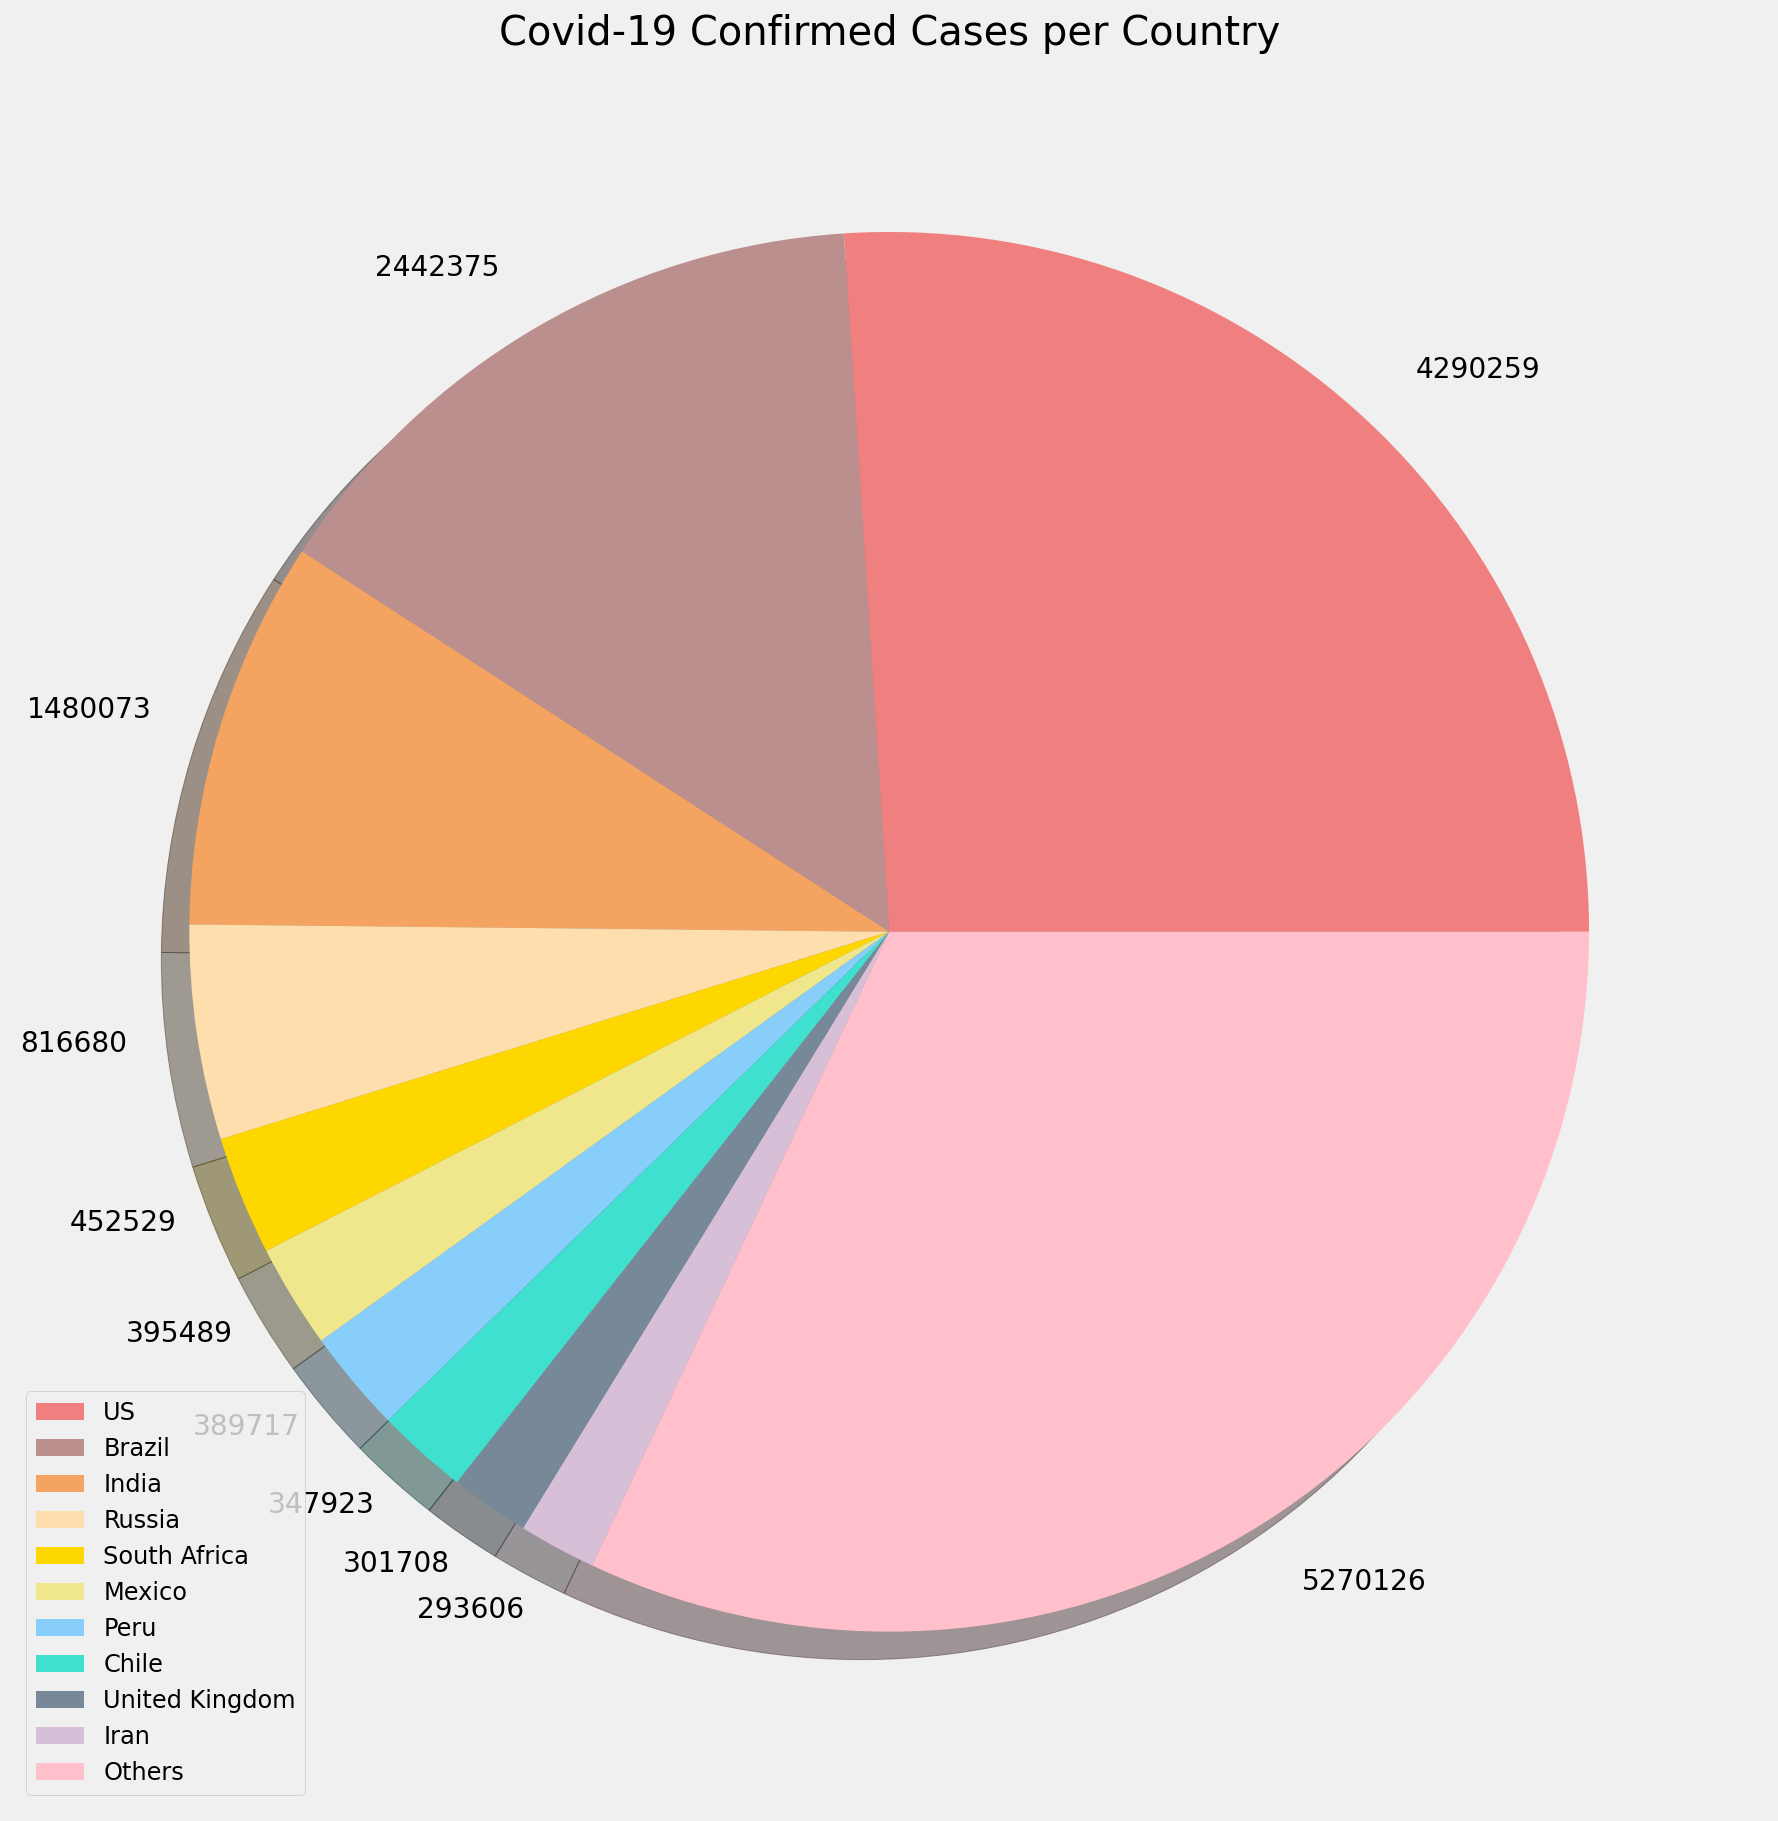

In [12]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()
    
plot_pie_charts(region_list, confirmed_list, 'Covid-19 Confirmed Cases per Country')

### Confirmed Cases In Map

In [13]:
'''geo = pd.read_csv('train.csv', parse_dates=['Date'])
geo.rename(columns={'Date': 'date', 
                     'Id': 'id',
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat',
                     'Long': 'long',
                     'ConfirmedCases': 'confirmed',
                     'Fatalities':'deaths',
                    }, inplace=True)
'''
geo = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
geo.rename(columns={'Date': 'date', 
                     'Id': 'id',
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat',
                     'Long': 'long',
                     'Confirmed': 'confirmed',
                     'Fatalities':'deaths',
                    }, inplace=True)


geo['state'] = geo['state'].fillna('')
temp = geo[[col for col in geo.columns if col != 'state']]

latest = temp[temp['date'] == max(temp['date'])].reset_index()
latest_grouped = latest.groupby('country')['confirmed', 'deaths'].sum().reset_index()

fig = px.choropleth(latest_grouped, locations="country", 
                    locationmode='country names', color="confirmed", 
                    hover_name="country", range_color=[1,4000], 
                    color_continuous_scale="reds", 
                    title='Countries with Confirmed Cases')

fig.show()

KeyError: "Columns not found: 'confirmed', 'deaths'"

In [ ]:
geo

In [ ]:
daily_data

## World Daily Increase in Confirmed Cases

- 2020/01/22 이후의 누적 확진자 수 증가와 새로운 확진자 수를 한 그래프 안에서 표현
- 누적 확진자 (청색) Bar 그래프 표현
- 신규 확진자 수(황색) Plot 그래프 표현

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 10))

ax1.bar(range(len(daily_data['Confirmed'])), daily_data['Confirmed'])
ax1.set_ylim(0, 20000000)

ax2 = ax1.twinx()
ax2.plot(range(len(daily_data['New cases'])), daily_data['New cases'], color='orange', linestyle='dashed')
ax2.set_ylim(0, 1000000)

plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving New Cases', 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


In [ ]:
country_data['Who Region']
df['A'].iplot(kind='bar')